# Arima

In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import itertools

data = pd.read_csv(r"C:\Users\fsp_adolpho.salvador\Desktop\Konica Minolta\Desktop Cloud - Documentos\Desktop\Py\Analise\Forecast\Arquivos\data.csv")
data['Date mais recente'] = pd.to_datetime(data['Date mais recente'])
data.set_index('Date mais recente', inplace=True)
ts_data = data['Total']

p = d = q = range(0, 4)  
pdq_combinations = list(itertools.product(p, d, q))

best_aic = float("inf")
best_order = None
best_model = None

for order in pdq_combinations:
    try:
        model = ARIMA(ts_data, order=order)
        fitted_model = model.fit()
        if fitted_model.aic < best_aic:
            best_aic = fitted_model.aic
            best_order = order
            best_model = fitted_model
    except Exception as e:
        continue

print(f"Melhor ordem (p, d, q): {best_order}")
print(f"Menor AIC: {best_aic}")

print(best_model.summary())


c:\Users\fsp_adolpho.salvador\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\fsp_adolpho.salvador\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\fsp_adolpho.salvador\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\fsp_adolpho.salvador\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, fr

Melhor ordem (p, d, q): (0, 3, 2)
Menor AIC: 668.1240320047456
                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   36
Model:                 ARIMA(0, 3, 2)   Log Likelihood                -331.062
Date:                Mon, 14 Apr 2025   AIC                            668.124
Time:                        19:51:05   BIC                            672.614
Sample:                    01-01-2021   HQIC                           669.635
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.9962      0.386     -5.168      0.000      -2.753      -1.239
ma.L2          0.9965      0.399      2.497      0.013       0.214  

c:\Users\fsp_adolpho.salvador\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


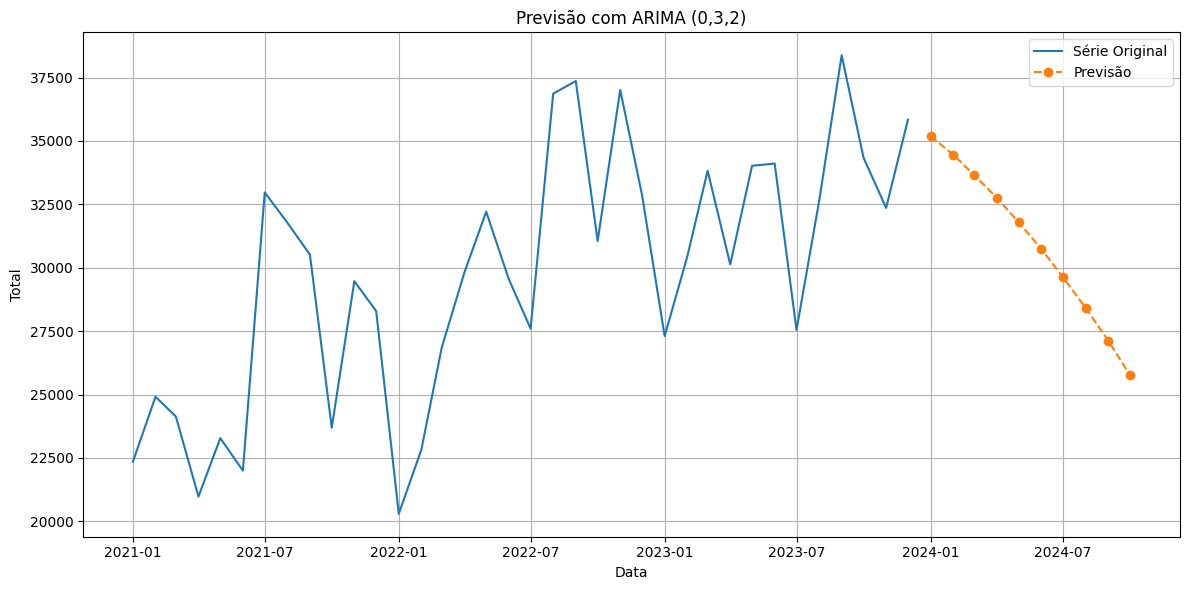

In [ ]:
import matplotlib.pyplot as plt

n_periods = 10

forecast = best_model.forecast(steps=n_periods)

forecast_index = pd.date_range(start=ts_data.index[-1], periods=n_periods + 1, freq='MS')[1:]

plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Série Original')

plt.plot(forecast_index, forecast, label='Previsão', linestyle='--', marker='o')

plt.title('Previsão com ARIMA (0,3,2)')
plt.xlabel('Data')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Users\fsp_adolpho.salvador\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\fsp_adolpho.salvador\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\fsp_adolpho.salvador\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


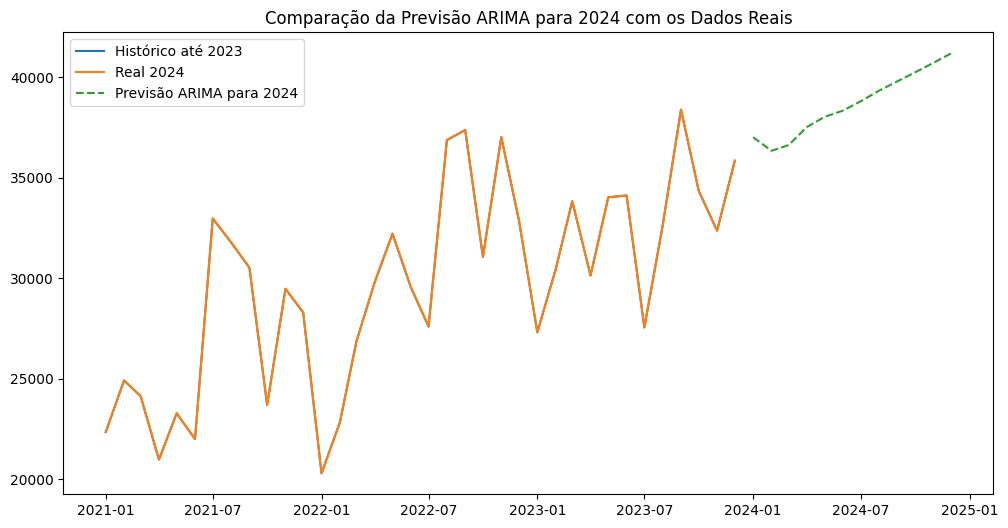

            Real 2024  Previsão ARIMA 2024
2021-01-01    22352.0                  NaN
2021-02-01    24914.0                  NaN
2021-03-01    24135.0                  NaN
2021-04-01    20978.0                  NaN
2021-05-01    23282.0                  NaN
2021-06-01    22000.0                  NaN
2021-07-01    32970.0                  NaN
2021-08-01    31780.0                  NaN
2021-09-01    30521.0                  NaN
2021-10-01    23695.0                  NaN
2021-11-01    29472.0                  NaN
2021-12-01    28291.0                  NaN
2022-01-01    20299.0                  NaN
2022-02-01    22827.0                  NaN
2022-03-01    26855.0                  NaN
2022-04-01    29807.0                  NaN
2022-05-01    32211.0                  NaN
2022-06-01    29555.0                  NaN
2022-07-01    27597.0                  NaN
2022-08-01    36867.0                  NaN
2022-09-01    37364.0                  NaN
2022-10-01    31055.0                  NaN
2022-11-01 

In [5]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\fsp_adolpho.salvador\Desktop\Konica Minolta\Desktop Cloud - Documentos\Desktop\Py\Analise\Forecast\Arquivos\data.csv")
data['Date mais recente'] = pd.to_datetime(data['Date mais recente'])
data.set_index('Date mais recente', inplace=True)
ts_data = data['Total']


model_full = ARIMA(ts_data, order=(2, 2, 1)) 
fitted_model_full = model_full.fit()

forecast_2024 = fitted_model_full.forecast(steps=12)

plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Histórico até 2023')
plt.plot(ts_data, label='Real 2024')
plt.plot(forecast_2024, label='Previsão ARIMA para 2024', linestyle='--')
plt.title('Comparação da Previsão ARIMA para 2024 com os Dados Reais')
plt.legend()
plt.show()


comparison_df = pd.DataFrame({
    'Real 2024': ts_data,
    'Previsão ARIMA 2024': forecast_2024
})
print(comparison_df)


# ExponentialSmoothing

In [ ]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

monthly_data = pd.read_csv(r"C:\Users\fsp_adolpho.salvador\Desktop\Konica Minolta\Desktop Cloud - Documentos\Desktop\Py\Analise\Forecast\Arquivos\data.csv")

# Selecionar a série temporal mensal
monthly_series = monthly_data['Total']

# Ajustar o modelo ETS com sazonalidade anual (período sazonal de 12 meses)
model = ExponentialSmoothing(monthly_series, 
                             trend='add', 
                             seasonal='add', 
                             seasonal_periods=12)
model_fit = model.fit()

# Previsão para os próximos 12 meses
forecast = model_fit.forecast(steps=12)


# Adicionar rótulos nos pontos dos dados históricos
forecast_df = forecast.to_frame(name='Previsão_Qtd_UM_registro')

# Exibir o DataFrame de previsão
forecast_df

In [ ]:
monthly_data.head

# LSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Carregar e pré-processar os dados
def load_and_preprocess_data(file_path, seq_length):
    data = pd.read_csv(file_path)
    data_values = data[['Total']].values  # Supondo que a coluna a ser usada é 'Total'
    
    # Normalizar os dados
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data_values)
    
    # Função para criar sequência de dados para o modelo LSTM
    def create_sequences(data, seq_length):
        X, y = [], []
        for i in range(len(data) - seq_length):
            X.append(data[i:i + seq_length])
            y.append(data[i + seq_length])
        return np.array(X), np.array(y)

    X, y = create_sequences(data_scaled, seq_length)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    return X_train, X_test, y_train, y_test, scaler, data_scaled

# Construir o modelo LSTM
def build_lstm_model(seq_length):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(seq_length, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Treinar o modelo com Early Stopping
def train_model(model, X_train, y_train, X_test, y_test):
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),
                        callbacks=[early_stopping], batch_size=16, verbose=0)
    return history

# Avaliação e visualização dos resultados
def evaluate_and_plot(model, X_test, y_test, scaler):
    y_pred_scaled = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_test_original = scaler.inverse_transform(y_test)
    
    plt.plot(y_test_original, label='Valor Real')
    plt.plot(y_pred, label='Previsão')
    plt.xlabel('Tempo')
    plt.ylabel('Demanda')
    plt.legend()
    plt.show()
    
    # Formatar resultados no padrão brasileiro
    results = pd.DataFrame({
        'Valor Real': [f"{val[0]:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".") for val in y_test_original],
        'Previsão': [f"{val[0]:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".") for val in y_pred]
    })
    return results

# Função para previsão de meses futuros
def forecast_future(model, scaler, data_scaled, seq_length, n_months):
    last_sequence = data_scaled[-seq_length:]
    predictions = []
    
    for _ in range(n_months):
        last_sequence_reshaped = last_sequence.reshape((1, seq_length, 1))
        next_pred_scaled = model.predict(last_sequence_reshaped)
        next_pred = scaler.inverse_transform(next_pred_scaled)
        predictions.append(next_pred[0, 0])
        last_sequence = np.append(last_sequence, next_pred_scaled).reshape(-1, 1)
        last_sequence = last_sequence[1:]

    # Formatar previsões no padrão brasileiro
    dates_2024 = pd.date_range(start='2024-01-01', periods=n_months, freq='M')
    forecast_2024 = pd.DataFrame({
        'Data': dates_2024,
        'Previsão de Demanda': [f"{val:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".") for val in predictions]
    })
    return forecast_2024

# Configurações principais
file_path = r"C:\Users\fsp_adolpho.salvador\Desktop\Konica Minolta\Desktop Cloud - Documentos\Desktop\data.csv"
seq_length = 12
n_months_to_predict = 12

# Execução completa
X_train, X_test, y_train, y_test, scaler, data_scaled = load_and_preprocess_data(file_path, seq_length)
model = build_lstm_model(seq_length)
train_model(model, X_train, y_train, X_test, y_test)
results = evaluate_and_plot(model, X_test, y_test, scaler)
forecast_2024 = forecast_future(model, scaler, data_scaled, seq_length, n_months_to_predict)

# Exibir previsões de 2024
forecast_2024

